In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df_json = pd.read_json("Musical_Instruments_5.json")
df_csv = pd.read_csv("Musical_instruments_reviews.csv")

In [211]:
df_json.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [212]:
df_json.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [213]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [214]:
df_json.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [215]:
df_json.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10261
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

In [216]:
df_json.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [217]:
print(f"The total number of reviews: {len(df_json)}")

The total number of reviews: 10261


In [218]:
df_json["overall"].unique

<bound method Series.unique of 0        5
1        5
2        5
3        5
4        5
        ..
10256    5
10257    5
10258    4
10259    4
10260    4
Name: overall, Length: 10261, dtype: int64>

In [219]:
overall_vc = df_json["overall"].value_counts()

In [220]:
overall_vc.values

array([6938, 2084,  772,  250,  217], dtype=int64)

In [221]:
helpful = df_json["helpful"][1]
if helpful[1] != 0: print(helpful[0]/helpful[1])

0.9285714285714286


<BarContainer object of 5 artists>

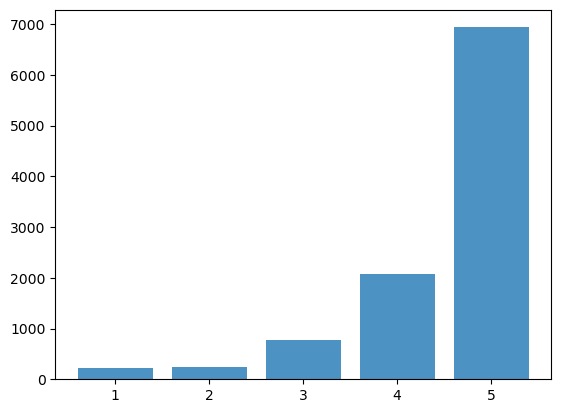

In [222]:
plt.bar(overall_vc.index, overall_vc.values, alpha=0.8)

In [223]:
for i in overall_vc.index:
    print(overall_vc[i])

6938
2084
772
250
217


<BarContainer object of 5 artists>

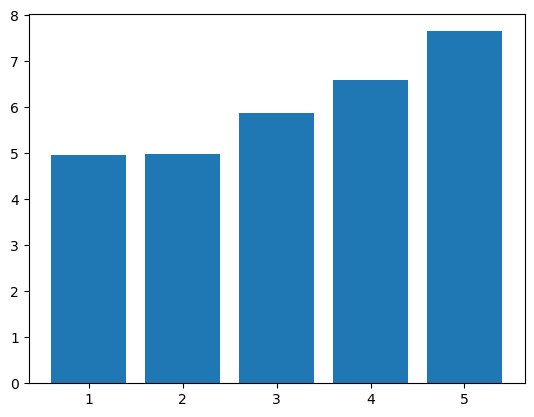

In [224]:
plt.bar(df_clean["overall"].value_counts().index, np.log(df_clean["overall"].value_counts().values))

# Preprocessing

In [225]:
df_json = df_json.drop(["reviewerID", "asin", "reviewerName", "unixReviewTime", "reviewTime"], axis=1)

In [226]:
df_json.head()

,helpful,reviewText,overall,summary
0,"[0, 0]","Not much to write about here, but it does exac...",5,good
1,"[13, 14]",The product does exactly as it should and is q...,5,Jake
2,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well
3,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY
4,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.


In [227]:
X = df_json.drop(["helpful", "overall", "summary"], axis=1)
y = df_json["overall"]

In [228]:
total_len = len(df_json)

In [229]:
threshold = 0.00001

In [230]:
to_remove = []
for index, review in enumerate(df_json["helpful"]):
    if review[1] == 0: to_remove.append(index)
print(to_remove)

[0, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 128, 129, 131, 132, 134, 135, 136, 137, 138, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 175, 176, 178, 179, 181, 182, 183, 184, 186, 192, 193, 195, 197, 198, 201, 202, 203, 204, 205, 209, 210, 213, 214, 215, 218, 219, 221, 222, 223, 224, 225, 227, 228, 229, 230, 233, 234, 235, 236, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 252, 256, 260, 262, 263, 264, 265, 269, 271, 273, 274, 275, 276, 278, 279, 280, 282, 283, 286, 287, 289, 291, 292, 293, 294, 295, 296, 29

In [231]:
df_clean = df_json.drop(to_remove)

In [232]:
len(df_clean) # Seems controversial to the assignment

3465

# Train Test Split

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=432423, shuffle=True)

1. How many samples: 10261
1. labels: 5 (1, 2, 3, 4, 5)
1. training/test samples: Need to decide
1. quirks(Repeated Behaviour / Unique Behaviour):
1. issues:
1. inconsistencies: Data is unbalanced
1. Label Distribution: Already done above

# Vocabulary Creation

In [235]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import nltk

In [236]:
vocabulary = defaultdict(lambda : 0)
count_of_voc_out = defaultdict(lambda : 0)

In [237]:
stop_words = set(stopwords.words("english"))

In [238]:
pattern = r"""(?x)                   # set flag to allow verbose regexps
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A.
              |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages
              |\w+(?:[-']\w+)*       # words w/ optional internal hyphens/apostrophe
              |(?:[+/\-@&*])         # special characters with meanings
            """

In [239]:
tokenizer = nltk.tokenize.regexp.RegexpTokenizer(pattern)

In [240]:
for review, output in zip(X_train.reviewText, y_train):
    review = review.lower()
    tokens = tokenizer.tokenize(review)
    for token in tokens:
        if token not in stop_words:
            vocabulary[token] += 1
            count_of_voc_out[(token, output)] += 1

In [241]:
print(vocabulary["got"])

806


In [242]:
print(count_of_voc_out[("got", 4)])

167


In [243]:
len(vocabulary), len(count_of_voc_out)

(19764, 36017)

# Sample Testing

In [244]:
def analyze_review(split_inputs, vocabulary, count_of_voc_out, overall_vc, total_len):
    analysis_log = {}
    
#     analysis = {}

    max_probability_key, max_probability_value = 0, 0
    for i in overall_vc.index:
        analysis_log[i] = np.log(overall_vc[i] / total_len)
        
#         print(i, np.exp(analysis_log[i]))
#         analysis[i] = (overall_vc[i] / total_len)

        for word in split_inputs:
            analysis_log[i] += np.log(count_of_voc_out[(word, i)] / overall_vc[i])
            
#             print(i, word, np.exp(np.log(count_of_voc_out[(word, i)] / overall_vc[i])))
#             analysis[i] *= (count_of_voc_out[(word, i)] / overall_vc[i])

        analysis_log[i] = np.exp(analysis_log[i])
        if analysis_log[i] > max_probability_value: max_probability_key = i; max_probability_value = analysis_log[i]
            
#     print(analysis, analysis_log)
#     print(max(analysis_log.values()))

    return max_probability_key, max_probability_value

In [245]:
sample_input = "Average Product"

In [246]:
sample_input = sample_input.lower()

In [247]:
split_inputs = tokenizer.tokenize(sample_input)

In [248]:
split_inputs

['average', 'product']

In [249]:
review_score, review_probability = analyze_review(split_inputs, vocabulary, count_of_voc_out, overall_vc, total_len)

C:\Users\swast\AppData\Local\Temp\ipykernel_24804\2778404012.py:10: RuntimeWarning: divide by zero encountered in log
  analysis_log[i] += np.log(count_of_voc_out[(word, i)] / overall_vc[i])


In [253]:
print(f"Review Score is {review_score}: {review_probability}")

Review Score is 5: 0.0001622400237064279
